# _typeset_: A GAP Package automating typesetting for common GAP objects

This Jupyter notebook goes through some of the work and functionality implemented as part of the 'typeset' GAP package, that aims to provide an automated framework for converting objects within GAP into typesettable (LaTeX) strings. Primarily, it implemented a function Typeset(x), where x can be a variety of objects within the GAP language. 

It can be installed with the following:

In [8]:
LoadPackage("digraphs"); LoadPackage("typeset");

true

true

<div class="alert alert-warning">
Note: the _digraphs_ dependency is optional, and only requires loading if you wish to use the integrated functionality. Additionally, the warnings can be ignored as they are only generated due to this notebook being executed on a browser.
</div>

<br></br>

## Simple Types
<div class="alert alert-info">
    
_typeset_ supports a number of basic types in the GAP language, including but not limited to:
    
- fractions
- rationals
- infinity
- permutations
- finite field elements
   
Some basic examples are included below.
</div>

First, a simple fraction:

In [6]:
x := 3 / 4;; Typeset(x);

\frac{3}{4}


Which looks like $\frac{3}{4}$ when rendered in LaTeX. Similarly, for a finite field element:

In [8]:
y := Z(2^10)^7;; Typeset(y);

Z(2^{10})^{7}


Which will look like $Z(2^{10})^{7}$. Some nice macros, like infinity, are also supported:

In [10]:
z := -infinity;; Typeset(z);

-\infty


Which will result in $-\infty$ when rendered in LaTeX.

<br></br>

## Matrices
<div class="alert alert-info">
    
_typeset_ also supports matrices, which typically look something like:

<br></br>

<center>$\left(\begin{array}{rr}
1 & 2 \\
2 & 3 \\
\end{array}\right)$</center>

</div>

In GAP, a Matrix will normally be created using something like:

In [11]:
m := [[1, 3, 5], [2, 7, 7]];

[ [ 1, 3, 5 ], [ 2, 7, 7 ] ]

Then, when calling the method Typeset implemented in this package, we get:

In [12]:
Typeset(m);

\left(\begin{array}{rrr}
1 & 3 & 5 \\
2 & 7 & 7 \\
\end{array}\right)


Which looks like the following in LaTeX:

<center>$\left(\begin{array}{rrr}
1 & 3 & 5 \\
2 & 7 & 7 \\
\end{array}\right)$</center>

Matrices also don't necessarily need to contain simple numbers (integers). They can also contain a variety of the other simple types supported. 

For example, we could have a matrix of finite-field elements:

In [14]:
x := [ [ Z(3)^0, Z(3)^0, Z(3) ], [ Z(3), 0*Z(3), Z(3) ], [ 0*Z(3), Z(3), 0*Z(3) ] ];; Typeset(x);

\left(\begin{array}{rrr}
Z(3)^{0} & Z(3)^{0} & Z(3) \\
Z(3) & 0 \times Z(3) & Z(3) \\
0 \times Z(3) & Z(3) & 0 \times Z(3) \\
\end{array}\right)


Which results in:

<center>$\left(\begin{array}{rrr}
Z(3)^{0} & Z(3)^{0} & Z(3) \\
Z(3) & 0 \times Z(3) & Z(3) \\
0 \times Z(3) & Z(3) & 0 \times Z(3) \\
\end{array}\right)$</center>

Additionally, you can customise matrices for certain purposes. For example, you may want the matrix to be surrounded by angled brackets instead. For this, you can set options within the call to Typeset, specifying customisations you want:

In [16]:
x := [[ 1/3, 5, 4 ], [ 5, 1, 1/3 ], [ 0, 3/5, 1 ]];; Typeset(x : LDelim := "<", RDelim := ">" );

\left\langle\begin{array}{rrr}
\frac{1}{3} & 5 & 4 \\
5 & 1 & \frac{1}{3} \\
0 & \frac{3}{5} & 1 \\
\end{array}\right\rangle


Which gives us the nice-looking matrix:

<center>$\left\langle\begin{array}{rrr}
\frac{1}{3} & 5 & 4 \\
5 & 1 & \frac{1}{3} \\
0 & \frac{3}{5} & 1 \\
\end{array}\right\rangle$</center>

<br></br>

## Rational Functions
Another interesting type in GAP supported by _typeset_ is rational functions. In essence, these are equations containing several numbers, as well as some unknown variables (e.g. x, y). Within GAP, we can specify these unknown variables as 'Indeterminates', and use them to construct these rational functions. For example, if we wanted a simple quadratic we could do:

In [19]:
x := Indeterminate(Rationals, 1);; f := x^2 + 2 * x + 3;; Typeset(f);

x_{1}^{2}+2x_{1}+3


Which will give us the following when typeset:
<center>$x_{1}^{2}+2x_{1}+3$</center>

This can also be extended to more complex rational functions, such as ones with multiple unknowns, or ones which have fractions as well:

In [21]:
x := Indeterminate(Rationals, 1);; y := Indeterminate(Rationals, 1);;

In [23]:
f := x^2 + 2 * x + 3;; g := y^2 + 4 * y - 12;;

In [24]:
Typeset(f / g);

\frac{x_{1}^{2}+2x_{1}+3}{x_{1}^{2}+4x_{1}-12}


Giving us the much more readable version in LaTeX of:

<center>$\frac{x_{1}^{2}+2x_{1}+3}{x_{1}^{2}+4x_{1}-12}$</center>

<br></br>

## Character Tables
Another interesting type that support was written for in typeset was character
tables. In summary, these are tabular representations of an underlying group
used to store information about attributes calculated through application of
theories defined in what is known as character theory.

Fortunately, GAP allows a lot of abstraction over the creation of such character tables – simply allows them to be created from the underlying group. For example, they can be made like:

In [25]:
c := CharacterTable(SymmetricGroup(3));;

And calling Typeset on this table results in:

In [26]:
Typeset(c);

#I  To use the gather* LaTeX environment in character tables, add the amsmath package to your premable \usepackage{amsmath}
\begin{gather*}
\begin{array}{c c c c}
 & 1a & 2a & 3a \\
X.1 & 1 & -1 & 1 \\
X.2 & 2 & . & -1 \\
X.3 & 1 & 1 & 1 \\
\end{array}
\end{gather*}


Visually, this looks like:
<center>$\begin{gather*}
\begin{array}{c c c c}
 & 1a & 2a & 3a \\
X.1 & 1 & -1 & 1 \\
X.2 & 2 & . & -1 \\
X.3 & 1 & 1 & 1 \\
\end{array}
\end{gather*}$</center>

More complex character tables are also supported, such as that for the alternating group:

In [28]:
c := CharacterTable(AlternatingGroup(4));; Typeset(c);

#I  To use the gather* LaTeX environment in character tables, add the amsmath package to your premable \usepackage{amsmath}
#I  To use the aligned LaTeX environment in table legends, add the amsmath package to your premable \usepackage{amsmath}
\begin{gather*}
\begin{array}{c c c c c}
 & 1a & 2a & 3a & 3b \\
X.1 & 1 & 1 & 1 & 1 \\
X.2 & 1 & 1 & A & \bar{A} \\
X.3 & 1 & 1 & \bar{A} & A \\
X.4 & 3 & -1 & . & . \\
\end{array}\\
\begin{aligned}
A &= E(3)^2 \\
 &= (-1-Sqrt(-3))/2 = -1-b3 \\
\end{aligned}
\end{gather*}


Which looks like:

<center>$\begin{gather*}
\begin{array}{c c c c c}
 & 1a & 2a & 3a & 3b \\
X.1 & 1 & 1 & 1 & 1 \\
X.2 & 1 & 1 & A & \bar{A} \\
X.3 & 1 & 1 & \bar{A} & A \\
X.4 & 3 & -1 & . & . \\
\end{array}\\
\begin{aligned}
A &= E(3)^2 \\
 &= (-1-Sqrt(-3))/2 = -1-b3 \\
\end{aligned}
\end{gather*}$</center>

<br></br>

## Generator Notation for Groups
An important concept in group theory is, of course, groups. One representation of groups is called generator notation, and is essentially a tuple/list of elements from which all elements within a group can be generated (hence the name). For instance, a person could want to define a matrix group using generator notation, in which case they would specify the basic matrices needed to define the group:

In [32]:
m1 := [ [ 1, 0 ], [ 3, 3 ] ];; m2 := [ [ 4, 0 ], [ -1, 5 ] ];; m3 := [ [ 7, 0 ], [ 9, 1 ] ];; g := Group( m1, m2, m3 );;

Now, they can call Typeset to format the group in generator notation:

In [33]:
Typeset(g);

\left\langle \left(\begin{array}{rr}
1 & 0 \\
3 & 3 \\
\end{array}\right),\left(\begin{array}{rr}
4 & 0 \\
-1 & 5 \\
\end{array}\right),\left(\begin{array}{rr}
7 & 0 \\
9 & 1 \\
\end{array}\right) \right\rangle


This looks like:
<center>$\left\langle \left(\begin{array}{rr}
1 & 0 \\
3 & 3 \\
\end{array}\right),\left(\begin{array}{rr}
4 & 0 \\
-1 & 5 \\
\end{array}\right),\left(\begin{array}{rr}
7 & 0 \\
9 & 1 \\
\end{array}\right) \right\rangle$</center>

Similarly, another type of group for which this notation is useful is finite-presented (FP) groups. An example creation (and typesetting) of one is:

In [36]:
f := FreeGroup( "a", "b" );; g := f / [ f.1^5, f.2^2];; Typeset(g);

\left\langle a,b \mid a^{5},b^{2} \right\rangle


And in LaTeX:
<center>$\left\langle a,b \mid a^{5},b^{2} \right\rangle
$</center>

<br></br>

## Structure Descriptions
One of the other features implemented as part of _typeset_ was converting concise string representations of groups known as structure descriptions into a LaTeX-digestible form. For example, rather than having to say the long name "finite cyclic group of size 4", you can simply say "C4". One example structure description is ""Phi(C4) . C4/Phi(C4)", and we can call the function TypesetStructureDescription on it as follows:

In [4]:
TypesetStructureDescription("Phi(C4) . C4/Phi(C4)");

\rm \Phi(C_{4}) \cdot C_{4}/\Phi(C_{4})


This will then look like (in LaTeX):
<center>$\rm \Phi(C_{4}) \cdot C_{4}/\Phi(C_{4})$</center>

Another interesting structure description is "C6 x ((C4 x C2) : C12)":

In [5]:
TypesetStructureDescription("C6 x ((C4 x C2) : C12)");

#I  To use the rtimes LaTeX command, add the amssymb package to your premable \usepackage{amssymb}
\rm C_{6} \times ((C_{4} \times C_{2}) \rtimes C_{12})


Resulting in:
<center>$\rm C_{6} \times ((C_{4} \times C_{2}) \rtimes C_{12})$</center>

<br></br>

## Directed Graphs
Lastly, one of the more visually appealing types supported is directed graphs implemented within the _digraphs_ package. Directed graphs, at a high level, can be thought of as connected circles (nodes) joined by arrows (edges), and arrows are one-way. One can create a directed graph as follows:

In [9]:
g := Digraph([[1, 2], [3, 2], [3, 4], [4, 2], [4, 1]]);;

While calling Typeset on the graph does work on a desktop installation, it doesn't on this Jupyter notebook due to restrictions on other programs required. However, trust me when I say that the following image is what is returned from calling the method on the graph!

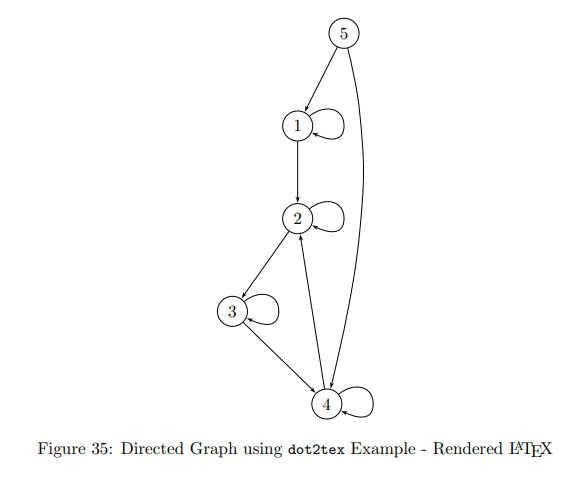

_typeset_ also provides multiple methods to generate the code for a digraph, which can be set using the option DigraphOut.

<br></br>

## Additional Features
_typeset_ also has several other features. For example, it has a verbose logging system that can print out debugging messages for users to help isolate errors or invalid output. For the more verbose level (3), the following command can be used:

In [37]:
SetInfoLevel(InfoTypeset, 3);

Then, for a basic example this will additionally print out some extra messages when calling Typeset:

In [96]:
Typeset([[[2]]]);

#I  Generating options record from default parameters
#I  Could not find installed typesetting method for object filter, falling back to ViewString()
[ [ [ 2 ] ] ]


_typeset_ also implements several features to render the returned output automatically. For example, given the returned LaTeX string as follows:

In [15]:
x := Indeterminate(Rationals, 1);; f := x + x^2 - 12 + 7 * x ^ 3;; Typeset(f);

7x_{1}^{3}+x_{1}^{2}+x_{1}-12


You can call the method RenderLatex() with an optional parameter 'output' set to one of the following:

- "mathjax", which creates and opens a HTML file containing the passed string and using MathJax to render it.
- "overleaf", which creates a new Overleaf project containing the passed string.
- "pdflatex", which generates a PDF file with pdflatex containing the passed string.

Unfortunately, this method only works on the desktop, as the GAP Jupyter Kernel can't open external programs (yet!).